In [1]:
import pandas as pd
from visualizations.vis import pcshow
import os.path as osp
import numpy as np

import time
%matplotlib inline

In [2]:
idx = 185
filename = '0'*(7-len(str(idx)))+str(idx)+"_labels.csv"
filename

'0000185_labels.csv'

In [11]:
filename = "0000010"
pcw = pd.read_csv("voxelling_output/submission_files/checks/%s_pointcloud.csv"%filename, header=None)/100
pred = pd.read_csv("voxelling_output/submission_files/checks/%s_labels.csv"%filename, header=None)
gt = pd.read_csv("voxelling_output/submission_files/checks/"%filename, header=None)

TypeError: not all arguments converted during string formatting

In [9]:
# labeled_pc
pcw["gt"] = pred.values
pcw = pcw.values

In [10]:
mask = np.zeros(pcw.shape[0]).astype(int)
mask[(pred==1.).values.T[0] & (pred==gt).values.T[0]] = 1       # tp - purple
mask[(pred==1.).values.T[0] & (pred!=gt).values.T[0]] = 2       # fp - orange
mask[(pred==0.).values.T[0] & (pred!=gt).values.T[0]] = 3       # fn - green

NameError: name 'gt' is not defined

In [6]:
pcshow(pcw, max_points=80000, point_cloud_coloring=mask)

In [7]:
df = pd.DataFrame(pcw)

In [8]:
df.columns = list('xyzrl')

In [9]:
# df[["x", "z"]].plot(kind="scatter", x="x", y="z")

In [10]:
df["z_mod"] = df.z/df.x#/np.tan(0.2*np.pi/180)

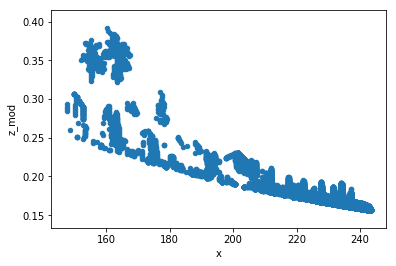

In [11]:
df.plot(kind="scatter", x="x", y="z_mod")